## 2024년 12월 말 데이터로 교체

In [1]:
import pandas as pd
df1 = pd.read_excel('../../bigfile/(2024.12월말기준)_전국공장등록현황.xlsx')

### 전처리

In [48]:
df1.shape # (217048, 38)

# 지역명 전처리
# 강원도 + 강원특별자치도 -> 강원특별자치도
# 제주도 + 제주특별자치도 -> 제주특별자치도

df1['시도명'] = df1['시도명'].replace('강원도', '강원특별자치도')
df1['시도명'] = df1['시도명'].replace('제주도', '제주특별자치도')

df1['시도명'].unique()
# # ['서울특별시', '부산광역시', ' ', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
# #        '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라남도', '경상북도',
# #        '경상남도', '제주특별자치도', '전북특별자치도']

# # '시도명'이 빈 문자열인 데이터 제거
df1 = df1[df1['시도명'] != ' ']

# df1.shape # (217036, 38)

### 표1. 시도별 공장등록수

In [9]:
## 시도명별 공장 등록수 갯수
factory_counts = df1['시도명'].value_counts()
print(factory_counts)

## 시도명별 공장 등록수 비중
total_factories = factory_counts.sum() # 전체 공장 등록 수
factory_percentage = ((factory_counts / total_factories) * 100).round(4) # 시도별 비중 계산
print(factory_percentage)

시도명
경기도        77885
경상남도       20564
경상북도       16448
인천광역시      14006
충청남도       12265
서울특별시      11442
부산광역시      11236
충청북도       10164
대구광역시       8950
전라남도        8158
전북특별자치도     7909
광주광역시       4858
강원특별자치도     4251
대전광역시       4042
울산광역시       3205
세종특별자치시      884
제주특별자치도      769
Name: count, dtype: int64
시도명
경기도        35.8858
경상남도        9.4749
경상북도        7.5785
인천광역시       6.4533
충청남도        5.6511
서울특별시       5.2719
부산광역시       5.1770
충청북도        4.6831
대구광역시       4.1237
전라남도        3.7588
전북특별자치도     3.6441
광주광역시       2.2383
강원특별자치도     1.9587
대전광역시       1.8624
울산광역시       1.4767
세종특별자치시     0.4073
제주특별자치도     0.3543
Name: count, dtype: float64


### 표1. 공장등록면적 ('용지면적' 컬럼 사용)

In [57]:
# 시도명별 용지면적 합계 계산
land_area = df1.groupby('시도명')['용지면적'].sum()

# 숫자 형식으로 보이게 (e 포함하는 숫자 불편)
pd.options.display.float_format = '{:.4f}'.format
print(land_area)

## 시도명별 용지면적 합계 비중
total_land_area = land_area.sum()
land_area_percentage = (land_area / total_land_area) * 100
print(land_area_percentage)

시도명
강원특별자치도    23739679.7820
경기도       196372735.9460
경상남도       98090743.3520
경상북도      108100449.0770
광주광역시      18689337.3920
대구광역시      22197385.2970
대전광역시      12555489.7720
부산광역시      30463410.3130
서울특별시       3289306.2630
세종특별자치시     6741243.7810
울산광역시      53574083.2140
인천광역시      23165239.5080
전라남도       83003738.9770
전북특별자치도    56667351.2200
제주특별자치도     2957695.1900
충청남도      112491445.6290
충청북도       82443209.0450
Name: 용지면적, dtype: float64
시도명
강원특별자치도    2.5402
경기도       21.0127
경상남도      10.4961
경상북도      11.5672
광주광역시      1.9998
대구광역시      2.3752
대전광역시      1.3435
부산광역시      3.2597
서울특별시      0.3520
세종특별자치시    0.7213
울산광역시      5.7327
인천광역시      2.4788
전라남도       8.8818
전북특별자치도    6.0636
제주특별자치도    0.3165
충청남도      12.0371
충청북도       8.8218
Name: 용지면적, dtype: float64


### 표1. 시도별 종업원 수

In [58]:
# 시도명별 종업원합계 계산
employees = df1.groupby('시도명')['종업원합계'].sum()
print(employees)

## 시도명별 종업원합계 비중
total_employees = employees.sum()
employees_percentage = ((employees / total_employees) * 100).round(4)
print(employees_percentage)
print(total_employees)

시도명
강원특별자치도      57430
경기도        1251420
경상남도        414317
경상북도        330915
광주광역시        82913
대구광역시       144069
대전광역시        67816
부산광역시       175108
서울특별시       150923
세종특별자치시      22854
울산광역시       146864
인천광역시       221125
전라남도        128023
전북특별자치도     136527
제주특별자치도       8883
충청남도        344684
충청북도        237382
Name: 종업원합계, dtype: int64
시도명
강원특별자치도    1.4646
경기도       31.9138
경상남도      10.5659
경상북도       8.4390
광주광역시      2.1145
대구광역시      3.6741
대전광역시      1.7294
부산광역시      4.4656
서울특별시      3.8488
세종특별자치시    0.5828
울산광역시      3.7453
인천광역시      5.6391
전라남도       3.2648
전북특별자치도    3.4817
제주특별자치도    0.2265
충청남도       8.7901
충청북도       6.0537
Name: 종업원합계, dtype: float64
3921253


### 표3. 

In [26]:
gyeonggi_df1 = df1[df1['시도명']=='경기도']
print(gyeonggi_df1.shape) # 77885
print(gyeonggi_df1['용지면적'].sum()) # 196372735.94600004
print(gyeonggi_df1['종업원합계'].sum()) # 1251420

(77885, 38)
196372735.94600004
1251420


In [59]:
# 초기 값, 최종 값, 기간 설정
initial_value = 58434  # 예: 공장등록수 초기 값
final_value = 77885    # 예: 공장등록수 최종 값
years = 11 # 2013년 12월 ~ 2024년 12월)

# CAGR 계산
cagr = ((final_value / initial_value) ** (1 / years)) - 1

# 퍼센트로 변환
cagr_percentage = cagr * 100

print(f"연평균 증가율: {cagr_percentage:.2f}%")

연평균 증가율: 2.65%


In [60]:
# 초기 값, 최종 값, 기간 설정
initial_value2 = 144333623.594  # 예: 공장등록수 초기 값
final_value2 = 196372735.94600004  # 예: 공장등록수 최종 값

# CAGR 계산
cagr2 = ((final_value2 / initial_value2) ** (1 / years)) - 1

# 퍼센트로 변환
cagr_percentage2 = cagr2 * 100

print(f"연평균 증가율: {cagr_percentage2:.2f}%")


연평균 증가율: 2.84%


In [61]:
# 초기 값, 최종 값, 기간 설정
initial_value3 = 1069074.594  # 예: 공장등록수 초기 값
final_value3 = 1251420    # 예: 공장등록수 최종 값

# CAGR 계산
cagr3 = ((final_value3 / initial_value3) ** (1 / years)) - 1

# 퍼센트로 변환
cagr_percentage3 = cagr3 * 100

print(f"연평균 증가율: {cagr_percentage3:.2f}%")

연평균 증가율: 1.44%


### 경기도 시군별 설립형태별 현황

In [51]:
gyeonggi_df1 = df1[df1['시도명']=='경기도']

# # # 시군구명에서 공백 뒤의 내용 삭제
# gyeonggi_df1['시군구명'] = gyeonggi_df1['시군구명'].str.split().str[0] # 32

# # # 여주군 데이터가 2개가 있는데 관리 기관이 경기도 여주시라서 여주시로 합쳐도 무관하다고 판단
# # # '여주군' 데이터를 '여주시' 데이터에 합치기
# gyeonggi_df1['시군구명'] = gyeonggi_df1['시군구명'].replace('여주군', '여주시')
# gyeonggi_df1.shape # (77885, 38)

# # gyeonggi_df1.to_csv('../../bigfile/경기_(2024.12월말기준)_전국공장등록현황.csv', index=False)

# 시군구명에서 공백을 기준으로 첫 번째 단어만 추출
gyeonggi_df1.loc[:, '시군구명'] = gyeonggi_df1['시군구명'].str.split().str[0]

# 특정 값을 다른 값으로 대체
gyeonggi_df1.loc[:, '시군구명'] = gyeonggi_df1['시군구명'].replace('여주군', '여주시')
gyeonggi_df1

gyeonggi_df1.to_csv('../../bigfile/경기_(2024.12월말기준)_전국공장등록현황.csv', index=False)

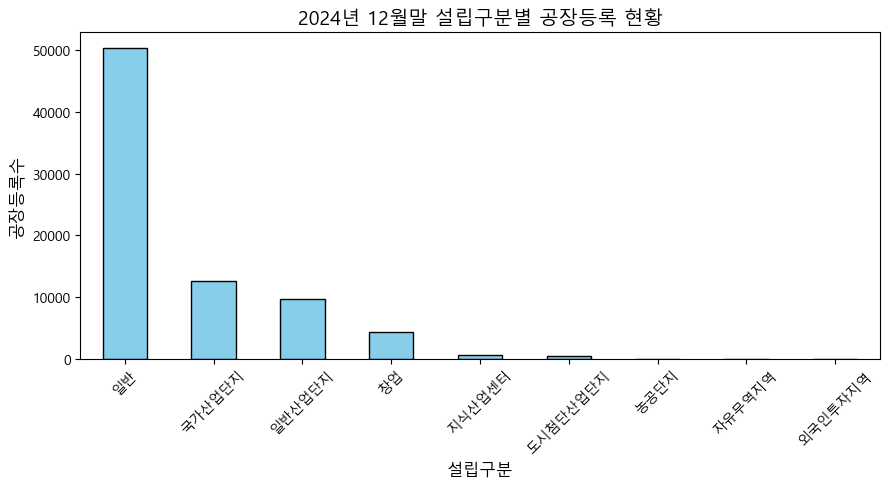

In [68]:
gyeonggi_df1['설립구분'].unique()
# ['일반', '창업', '일반산업단지', '지식산업센터', '도시첨단산업단지', '국가산업단지', '자유무역지역',
#    '농공단지', '외국인투자지역']

# [일반, 공장설립계획, 국가산단, 일반-첨단산단, 농공단지, 외국인투자, 자유무역지역, 도시첨단산업단지]

establishment_counts  = gyeonggi_df1['설립구분'].value_counts()
# 일반          50419
# 국가산업단지      12624
# 일반산업단지       9740
# 창업           4233
# 지식산업센터        507
# 도시첨단산업단지      347
# 농공단지            9
# 자유무역지역          5
# 외국인투자지역         1

## 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(9, 5))

# 막대 그래프 그리기
establishment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('2024년 12월말 설립구분별 공장등록 현황', fontsize=14)
plt.xlabel('설립구분', fontsize=12)
plt.ylabel('공장등록수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
# Group by '시군구명' and '설립구분' to count the occurrences
grouped_df = gyeonggi_df1.groupby(['시군구명', '설립구분']).size().reset_index(name='공장등록수')

# Reshape the data for better readability (pivot table)
pivot_df = grouped_df.pivot(index='시군구명', columns='설립구분', values='공장등록수').fillna(0)

# Convert values to integers for better readability
pivot_df = pivot_df.astype(int)
pivot_df.to_csv('../../bigfile/시군구별설립구분별.csv')


PermissionError: [Errno 13] Permission denied: '../../bigfile/시군구별설립구분별.csv'

일반
국가산업단지 -> 시흥5000 안산 7000 파주 200 평택 190
일반산업단지
창업
지식산업센터 -> 김포 110 성남 280 수원 15 시흥 48 안산 45
도시첨단산업단지 -> 성남 73 안양 43 용인 117 화성 114
농공단지 -> 안성 8 의왕 1
자유무역지역 -> 평택 4 화성 1
외국인투자지역 -> 화성 1

In [62]:
data = pd.read_csv('../../bigfile/시군구별설립구분.csv', encoding='utf-8')

# Add row sums (시군구명별 합계) and column sums (설립구분별 합계)
data['합계'] = data.iloc[:, 1:].sum(axis=1)  # Add a column for row sums
column_totals = data.iloc[:, 1:].sum(axis=0)  # Calculate column sums
column_totals['시군구명'] = '합계'  # Label for the new row

# Append column sums as a new row
data_with_totals = pd.concat([data, pd.DataFrame([column_totals])], ignore_index=True)
data_with_totals

,시군구명,일반,국가산업단지,일반산업단지,창업,지식산업센터,도시첨단산업단지,합계
0,가평군,142,0,12,12,0,0,166
1,고양시,1337,0,0,7,0,0,1344
2,과천시,29,0,0,0,0,0,29
3,광명시,723,0,0,6,0,0,729
4,광주시,2471,0,0,63,0,0,2534
5,구리시,140,0,0,14,0,0,154
6,군포시,1517,0,112,14,0,0,1643
7,김포시,5962,0,1595,290,118,0,7965
8,남양주시,2099,0,117,368,0,0,2584
9,동두천시,148,0,78,11,0,0,237


In [63]:
# Filter the necessary 설립구분 values
relevant_categories = ['일반', '국가산업단지', '일반산업단지', '창업']
filtered_data = gyeonggi_df1[gyeonggi_df1['설립구분'].isin(relevant_categories)]

# Group by '시군구명' and '설립구분', then count the occurrences
grouped_data = filtered_data.groupby(['시군구명', '설립구분']).size().reset_index(name='공장수')

# Pivot the table to get 설립구분 as columns
pivot_df = grouped_data.pivot(index='시군구명', columns='설립구분', values='공장수').fillna(0)

# Add a '합계' column for each 시군구명 (row sums)
pivot_df['합계'] = pivot_df.sum(axis=1)

# Add a total row ('합계') for each 설립구분 (column sums)
pivot_df.loc['합계'] = pivot_df.sum(axis=0)
pivot_df

설립구분,국가산업단지,일반,일반산업단지,창업,합계
시군구명,,,,,
가평군,0.0000,142.0000,12.0000,12.0000,166.0000
고양시,0.0000,1337.0000,0.0000,7.0000,1344.0000
과천시,0.0000,29.0000,0.0000,0.0000,29.0000
광명시,0.0000,723.0000,0.0000,6.0000,729.0000
광주시,0.0000,2471.0000,0.0000,63.0000,2534.0000
구리시,0.0000,140.0000,0.0000,14.0000,154.0000
군포시,0.0000,1517.0000,112.0000,14.0000,1643.0000
김포시,0.0000,5962.0000,1595.0000,290.0000,7847.0000
남양주시,0.0000,2099.0000,117.0000,368.0000,2584.0000
